In [6]:
%load_ext autoreload
%autoreload 2     

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, frameon=True, vector_friendly=True, fontsize=8)

In [8]:
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from GARDEN import GARDEN
import scanpy as sc
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"

In [9]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Brain_Section_2")

/home/zhangxinming/anaconda3/envs/stGACN_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [17]:
# 10 7 
model = GARDEN.GARDEN(adata,model_select='Radius',k_cl=7,rad_cutoff=500,device=device)
adatas1 = model.train()

/home/zhangxinming/anaconda3/envs/stGACN_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Constructed graph for CL.
6.0000 neighbors per cell on average.
Constructed graph for Graph Dynamic Attention.
11.6943 neighbors per cell on average.
Begin to train ST data...


100%|██████████| 800/800 [01:09<00:00, 11.56it/s]


Optimization finished for ST data!


In [21]:
n_clusters = 7
radius = 30
tool = 'mclust' # mclust, leiden, and louvain

# clustering
from GARDEN.utils import clustering

if tool == 'mclust':
   clustering(adatas1, n_clusters, radius=radius, method=tool, refinement=True) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adatas1, n_clusters, radius=radius, method=tool, start=0.1, end=0.8, increment=0.01, refinement=False)

fitting ...
  |======================================================================| 100%


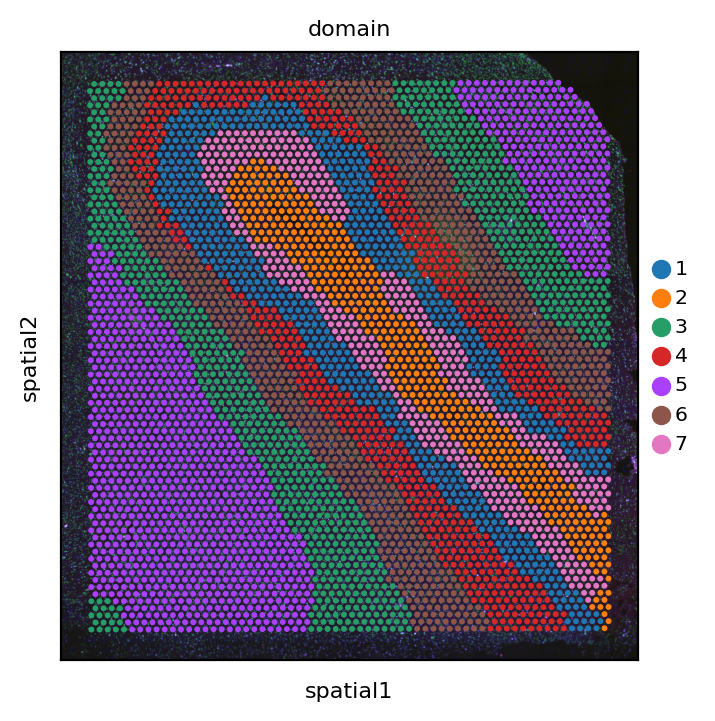

In [22]:
sc.pl.spatial(adatas1,basis='spatial',color = ['domain'],spot_size = 200)